### Regression Model setting
1. Model forcast S&P 500 stock index
    Should be transform this index series? 
2. Large set of explanatory variables
    Which one to select?
3. Choice of model
    How to evaluate the candidate model and how to compare them?
    Is the relation stable over time?

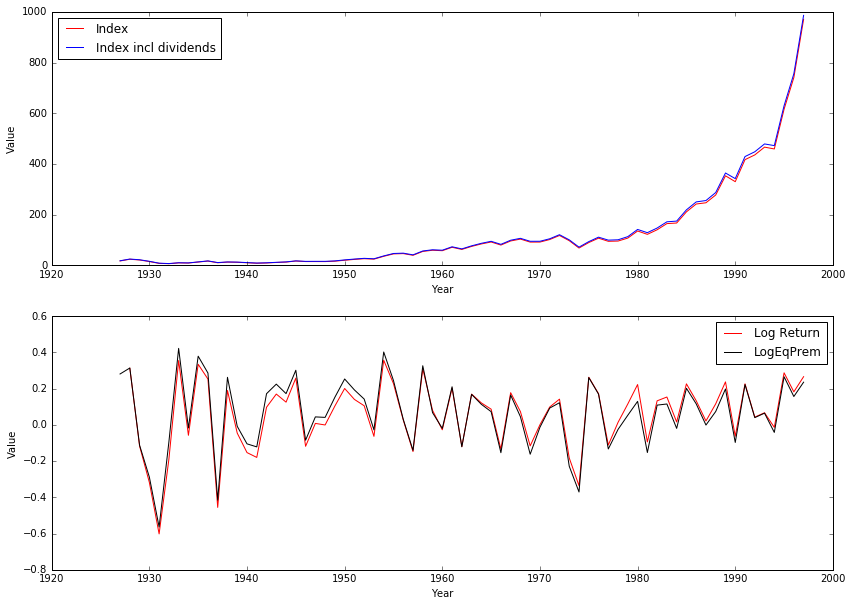

In [1]:
%matplotlib inline
import sys
sys.path.append('/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3')
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from xforex.BackTesting.econometrics_tools import Econometrics_Tool
import numpy as np

# Transformation
dat = pd.read_csv(
        '/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3/training/econometrics/week3-model-specifiction/TrainExer_corrected.csv',
       sep='\t')
# dat.index = dat['Year']
plt.figure(1, figsize=(14, 10))
plt.subplot(211)
plt.plot(dat['Year'], dat['Index'], 'r-', label='Index')  
plt.plot(dat['Year'], (dat['Index'] + dat[' Dividends']), 'b-', label='Index incl dividends')  
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(dat['Year'], np.log(dat['Index']+dat[' Dividends']).diff(1), 'r-', label='Log Return')  
plt.plot(dat['Year'], dat['LogEqPrem'], 'k-', label='LogEqPrem')  

plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best')



In [2]:
# Variable Selection
 # Econometrics_Tool().linear_fit(dat[['BookMarket','Inflation','NTIS','DivPrice','EarnPrice']], dat['LogEqPrem'])
model_full = Econometrics_Tool().linear_fit(dat[['BookMarket','Inflation','NTIS','DivPrice','EarnPrice']], dat['LogEqPrem'])

                            OLS Regression Results                            
Dep. Variable:              LogEqPrem   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     3.290
Date:                Mon, 12 Sep 2016   Prob (F-statistic):             0.0104
Time:                        13:49:38   Log-Likelihood:                 24.918
No. Observations:                  71   AIC:                            -37.84
Df Residuals:                      65   BIC:                            -24.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1776      0.416     -0.427      0.6

In [3]:
model = Econometrics_Tool().iter_linear_fit(dat[['BookMarket','Inflation','NTIS','DivPrice','EarnPrice']], dat['LogEqPrem'])

                            OLS Regression Results                            
Dep. Variable:              LogEqPrem   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     3.290
Date:                Mon, 12 Sep 2016   Prob (F-statistic):             0.0104
Time:                        13:49:38   Log-Likelihood:                 24.918
No. Observations:                  71   AIC:                            -37.84
Df Residuals:                      65   BIC:                            -24.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1776      0.416     -0.427      0.6

In [4]:
# Stability
# second war 1939 -1945
# oil crisis 1973 -1979
dat['dumyWar'] = 0
dat.loc[1939:1945]['dumyWar'] = 1
# print dat[dat['dumyWar']==1]
dat['dumyOilCrisis'] = 0
dat.loc[1973:1979]['dumyOilCrisis'] = 1
# print dat[dat['dumyOilCrisis']==1]
Econometrics_Tool().linear_fit(dat[['BookMarket','dumyOilCrisis','dumyWar']], dat['LogEqPrem'])



                            OLS Regression Results                            
Dep. Variable:              LogEqPrem   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.269
Date:                Mon, 12 Sep 2016   Prob (F-statistic):              0.136
Time:                        13:49:38   Log-Likelihood:                 14.166
No. Observations:                  71   AIC:                            -26.33
Df Residuals:                      70   BIC:                            -24.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
BookMarket        0.0521      0.035      1.506

In [5]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from tabulate import tabulate
## comparsion between models
df_compare = pd.DataFrame(index=['r-square', 'aic', 'bic'])
df_compare['model_full'] = [model_full.rsquared, model_full.aic, model_full.bic]
df_compare['model'] = [model.rsquared, model.aic, model.bic]
print tabulate(df_compare, headers='keys', tablefmt='psql')


name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)
# although the  r-square is higher in full model
# but both aic and bic is higher in only book-to-market model

+----------+--------------+-----------+
|          |   model_full |     model |
|----------+--------------+-----------|
| r-square |     0.201963 |   0.14503 |
| aic      |   -37.8353   | -40.9427  |
| bic      |   -24.2593   | -36.4173  |
+----------+--------------+-----------+


[('Jarque-Bera', 1.866941767808616),
 ('Chi^2 two-tail prob.', 0.39318663410283039),
 ('Skew', -0.3932974510670299),
 ('Kurtosis', 3.111118708438199)]

                            OLS Regression Results                            
Dep. Variable:              LogEqPrem   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.269
Date:                Mon, 12 Sep 2016   Prob (F-statistic):              0.136
Time:                        13:49:39   Log-Likelihood:                 14.166
No. Observations:                  71   AIC:                            -26.33
Df Residuals:                      70   BIC:                            -24.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
BookMarket     0.0521      0.035      1.506      0.1

/Users/CJ/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


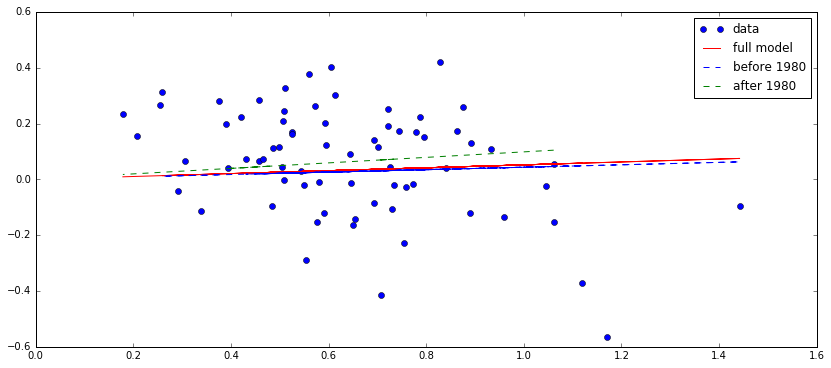

In [6]:
# after 1980 model test
from scipy import stats
from statsmodels.stats.outliers_influence import reset_ramsey
df_stat = pd.DataFrame(index=['jarque_bera test', 'RESET', 'Chow-break', 'Chow-forcast'])


# RESET TEST： for higher degree dependency
RESET_test = [str(reset_ramsey(model, degree=2)).split(",")[0], \
              str(reset_ramsey(model, degree=2)).split(",")[1].split("=")[1]]

# chow break: stability
dat.index = dat['Year']
chow_break = Econometrics_Tool().chow_break(dat['BookMarket'], dat['LogEqPrem'], 1980)


# chow forcast:


dat.index = dat['Year']
chow_forcast = Econometrics_Tool().chow_forcast(dat['BookMarket'], dat['LogEqPrem'], 0.2)



df_stat['stat'] = [stats.jarque_bera(model.resid)[0], RESET_test[0] , chow_break[0] ,chow_forcast[0]]
df_stat['p-value'] = [stats.jarque_bera(model.resid)[1], RESET_test[1], chow_break[1] ,chow_forcast[1]]


print tabulate(df_stat, headers='keys', tablefmt='psql')

In [7]:
import statsmodels.api as sm
X1 = sm.add_constant(dat.drop('Year', axis=1))

In [8]:
print dat.tail()
print dat.drop(dat.tail().index, axis=0).tail()


      Year   Index   Dividends  Riskfree  LogEqPrem  BookMarket      NTIS  \
Year                                                                        
1993  1993  466.45       12.58    0.0306   0.064645    0.305267  0.045749   
1994  1994  459.27       13.18    0.0560  -0.041707    0.291568  0.016595   
1995  1995  615.93       13.79    0.0514   0.265514    0.255026  0.015641   
1996  1996  740.74       14.90    0.0491   0.156499    0.207343  0.024101   
1997  1997  970.43       15.49    0.0516   0.235613    0.178801  0.015579   

      DivPrice  EarnPrice  Inflation  dumyWar  dumyOilCrisis  
Year                                                          
1993    -3.613     -3.059   0.027438        0              0  
1994    -3.551     -2.709   0.026709        0              0  
1995    -3.799     -2.898   0.025341        0              0  
1996    -3.906     -2.951   0.033162        0              0  
1997    -4.138     -3.196   0.016999        0              0  
      Year   Index 

In [9]:
dat.describe()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,dumyWar,dumyOilCrisis
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.0
mean,1962.000000,126.541549,4.002394,0.038989,0.064763,0.642657,0.022383,-3.196169,-2.623056,0.032385,0.0,0.0
std,20.639767,181.080746,4.183696,0.032276,0.192050,0.238288,0.027405,0.339230,0.340544,0.044910,0.0,0.0
min,1927.000000,6.890000,0.440000,0.000200,-0.563742,0.178801,-0.027197,-4.138000,-3.263000,-0.103578,0.0,0.0
25%,1944.500000,16.970000,0.845000,0.011550,-0.034658,0.501666,0.011229,-3.423500,-2.886500,0.011920,0.0,0.0
50%,1962.000000,68.560000,2.130000,0.032200,0.073728,0.604120,0.022853,-3.254000,-2.671000,0.029605,0.0,0.0
75%,1979.500000,120.300000,5.905000,0.055650,0.200059,0.766721,0.028558,-2.950500,-2.394000,0.047572,0.0,0.0
max,1997.000000,970.430000,15.490000,0.154900,0.422211,1.442084,0.165576,-2.293000,-1.893000,0.178703,0.0,0.0


In [10]:
x = dat['Year']

In [11]:
x.shape[0]

71